In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
### reading through the cleaned data from the 'cleaning data' notebook
df = pd.read_csv('cleaned_up_data.csv')

In [32]:
### Dropping this column which appears when the file is read
df.drop(columns = ['Unnamed: 0'], inplace = True)

<font size="6"><font color='orange'>Further data cleaning from EDA analysis</font>

<font size="6"><font color='orange'>Start of EDA</font>

In [33]:
df.head()

,price,house_type,bedroom,property_no,postcode,latitude,longitude,distance
0,196000,Semi-Detached,3,1,NE20,55.06467,-1.75250,13.920984
1,389995,Detached,4,2,NE3,55.00622,-1.61665,4.309192
2,350000,Detached,4,3,NE23,55.09966,-1.59675,14.759397
3,200000,Semi-Detached,3,4,NE9,54.94586,-1.59928,2.624904
4,335995,Semi-Detached,4,5,NE23,55.09966,-1.59675,14.759397


In [34]:
### Checking the numeric data for huge errors
df.describe()

,price,bedroom,property_no,latitude,longitude,distance
count,2.671000e+03,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,2.534099e+05,3.260202,1881.278173,54.878506,-1.473654,7.607532
std,2.258236e+05,0.949701,1346.294721,0.193480,0.190422,5.039962
min,2.000000e+04,1.000000,1.000000,54.454270,-2.088820,0.000048
25%,1.300000e+05,3.000000,806.500000,54.682480,-1.616650,3.889935
50%,2.000000e+05,3.000000,1657.000000,54.960530,-1.487093,7.048287
75%,3.000000e+05,4.000000,2596.500000,55.006220,-1.341780,12.167572
max,3.950000e+06,9.000000,5015.000000,55.182780,-0.973980,30.314963


In [35]:
## Checking correlations
df.corr()

C:\Users\wdre6\AppData\Local\Temp\ipykernel_5464\1910722410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedroom,property_no,latitude,longitude,distance
price,1.000000,0.572389,-0.144264,0.205334,-0.217766,0.181923
bedroom,0.572389,1.000000,-0.081916,0.097402,-0.106995,0.067512
property_no,-0.144264,-0.081916,1.000000,-0.424925,0.509466,-0.276220
latitude,0.205334,0.097402,-0.424925,1.000000,-0.777379,0.247690
longitude,-0.217766,-0.106995,0.509466,-0.777379,1.000000,-0.104753
distance,0.181923,0.067512,-0.276220,0.247690,-0.104753,1.000000


C:\Users\wdre6\AppData\Local\Temp\ipykernel_5464\1079750225.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


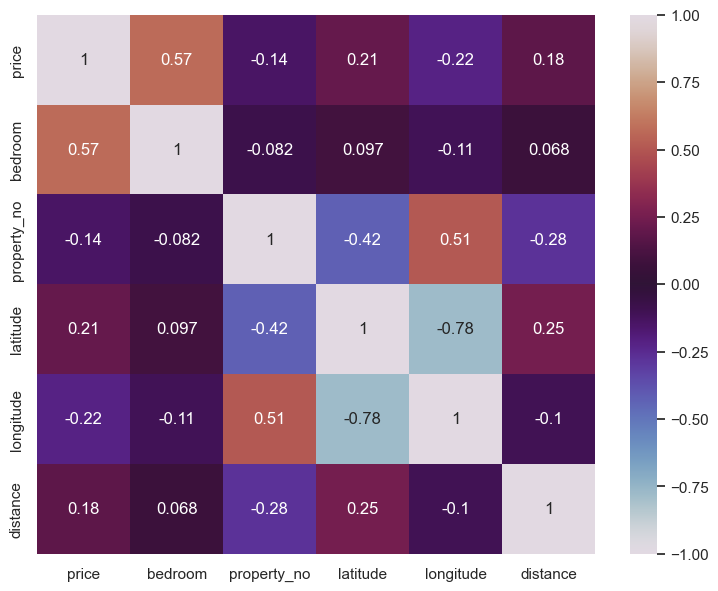

In [36]:
### Heatmap to show the correlations between numeric columns
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(),
            annot = True,
            cmap='twilight',
            vmin=-1, vmax=1)
plt.show()

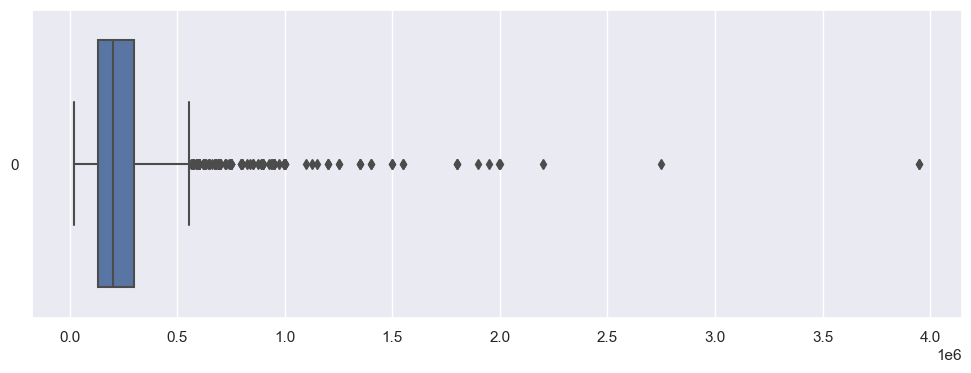

In [37]:
### Check for outliers in the price
plt.figure(figsize = (12, 4))
sns.boxplot(data = df['price'],
            orient = 'h')
plt.show()

In [38]:
df['price'].value_counts()

125000    57
150000    50
120000    50
110000    46
90000     43
          ..
204995     1
849950     1
206666     1
407950     1
20000      1
Name: price, Length: 508, dtype: int64

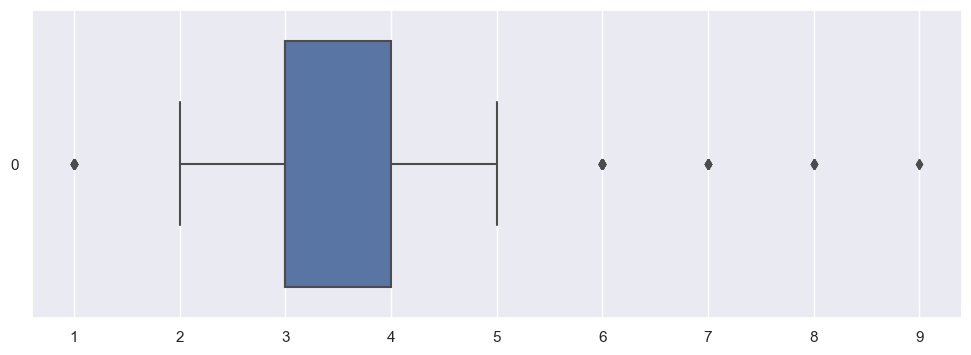

In [39]:
### Check for outliers in the bedrooms
# From this, and the value_counts(), I can see most properties have 2,3,4 or 5 bedrooms. Only about 3% have 1,6,7 or 8
plt.figure(figsize = (12, 4))
sns.boxplot(data = df['bedroom'],
            orient = 'h')
plt.show()

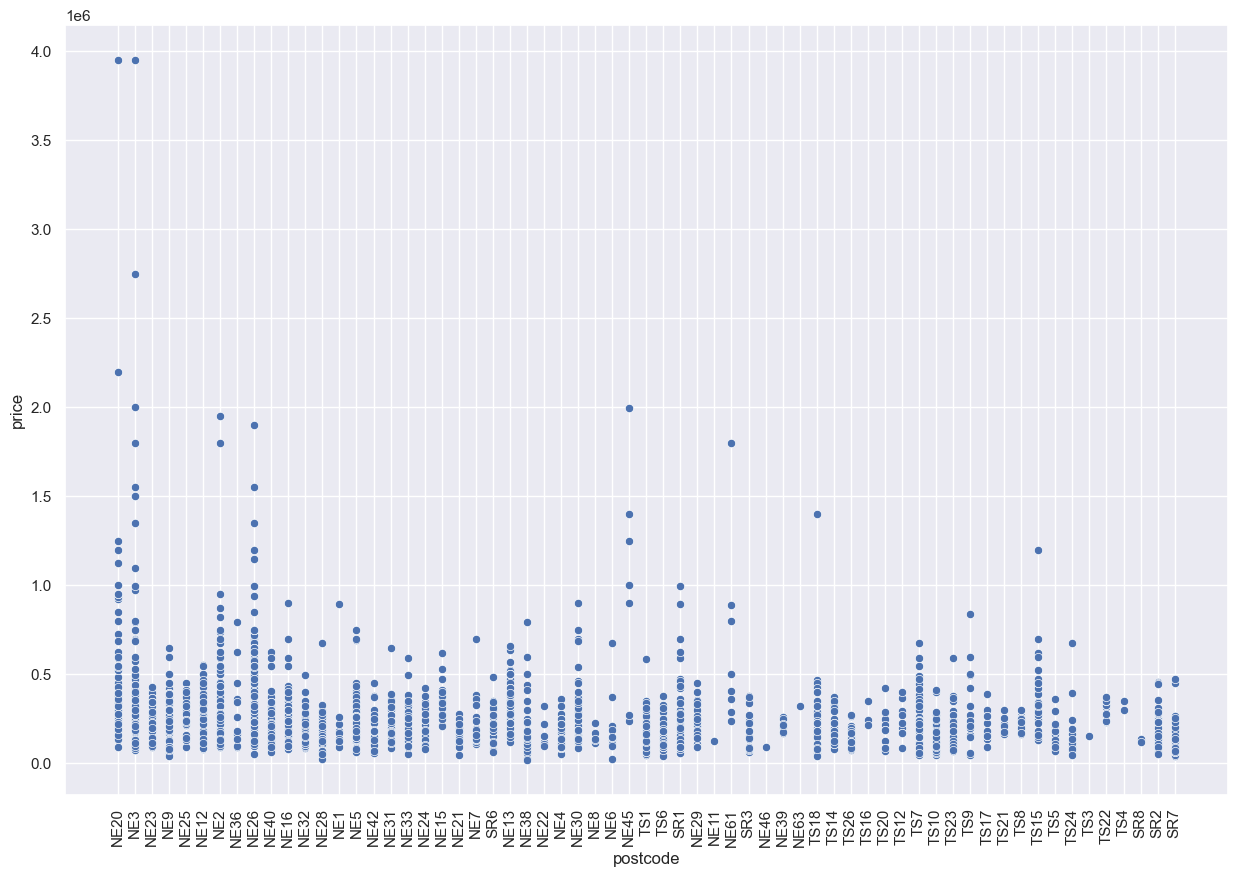

In [40]:
### Looking for a correlation between price and postcode
plt.figure(figsize = (15,10))
sns.scatterplot(data =df, y = 'price', x = 'postcode')
plt.xticks(rotation =90)
plt.show()

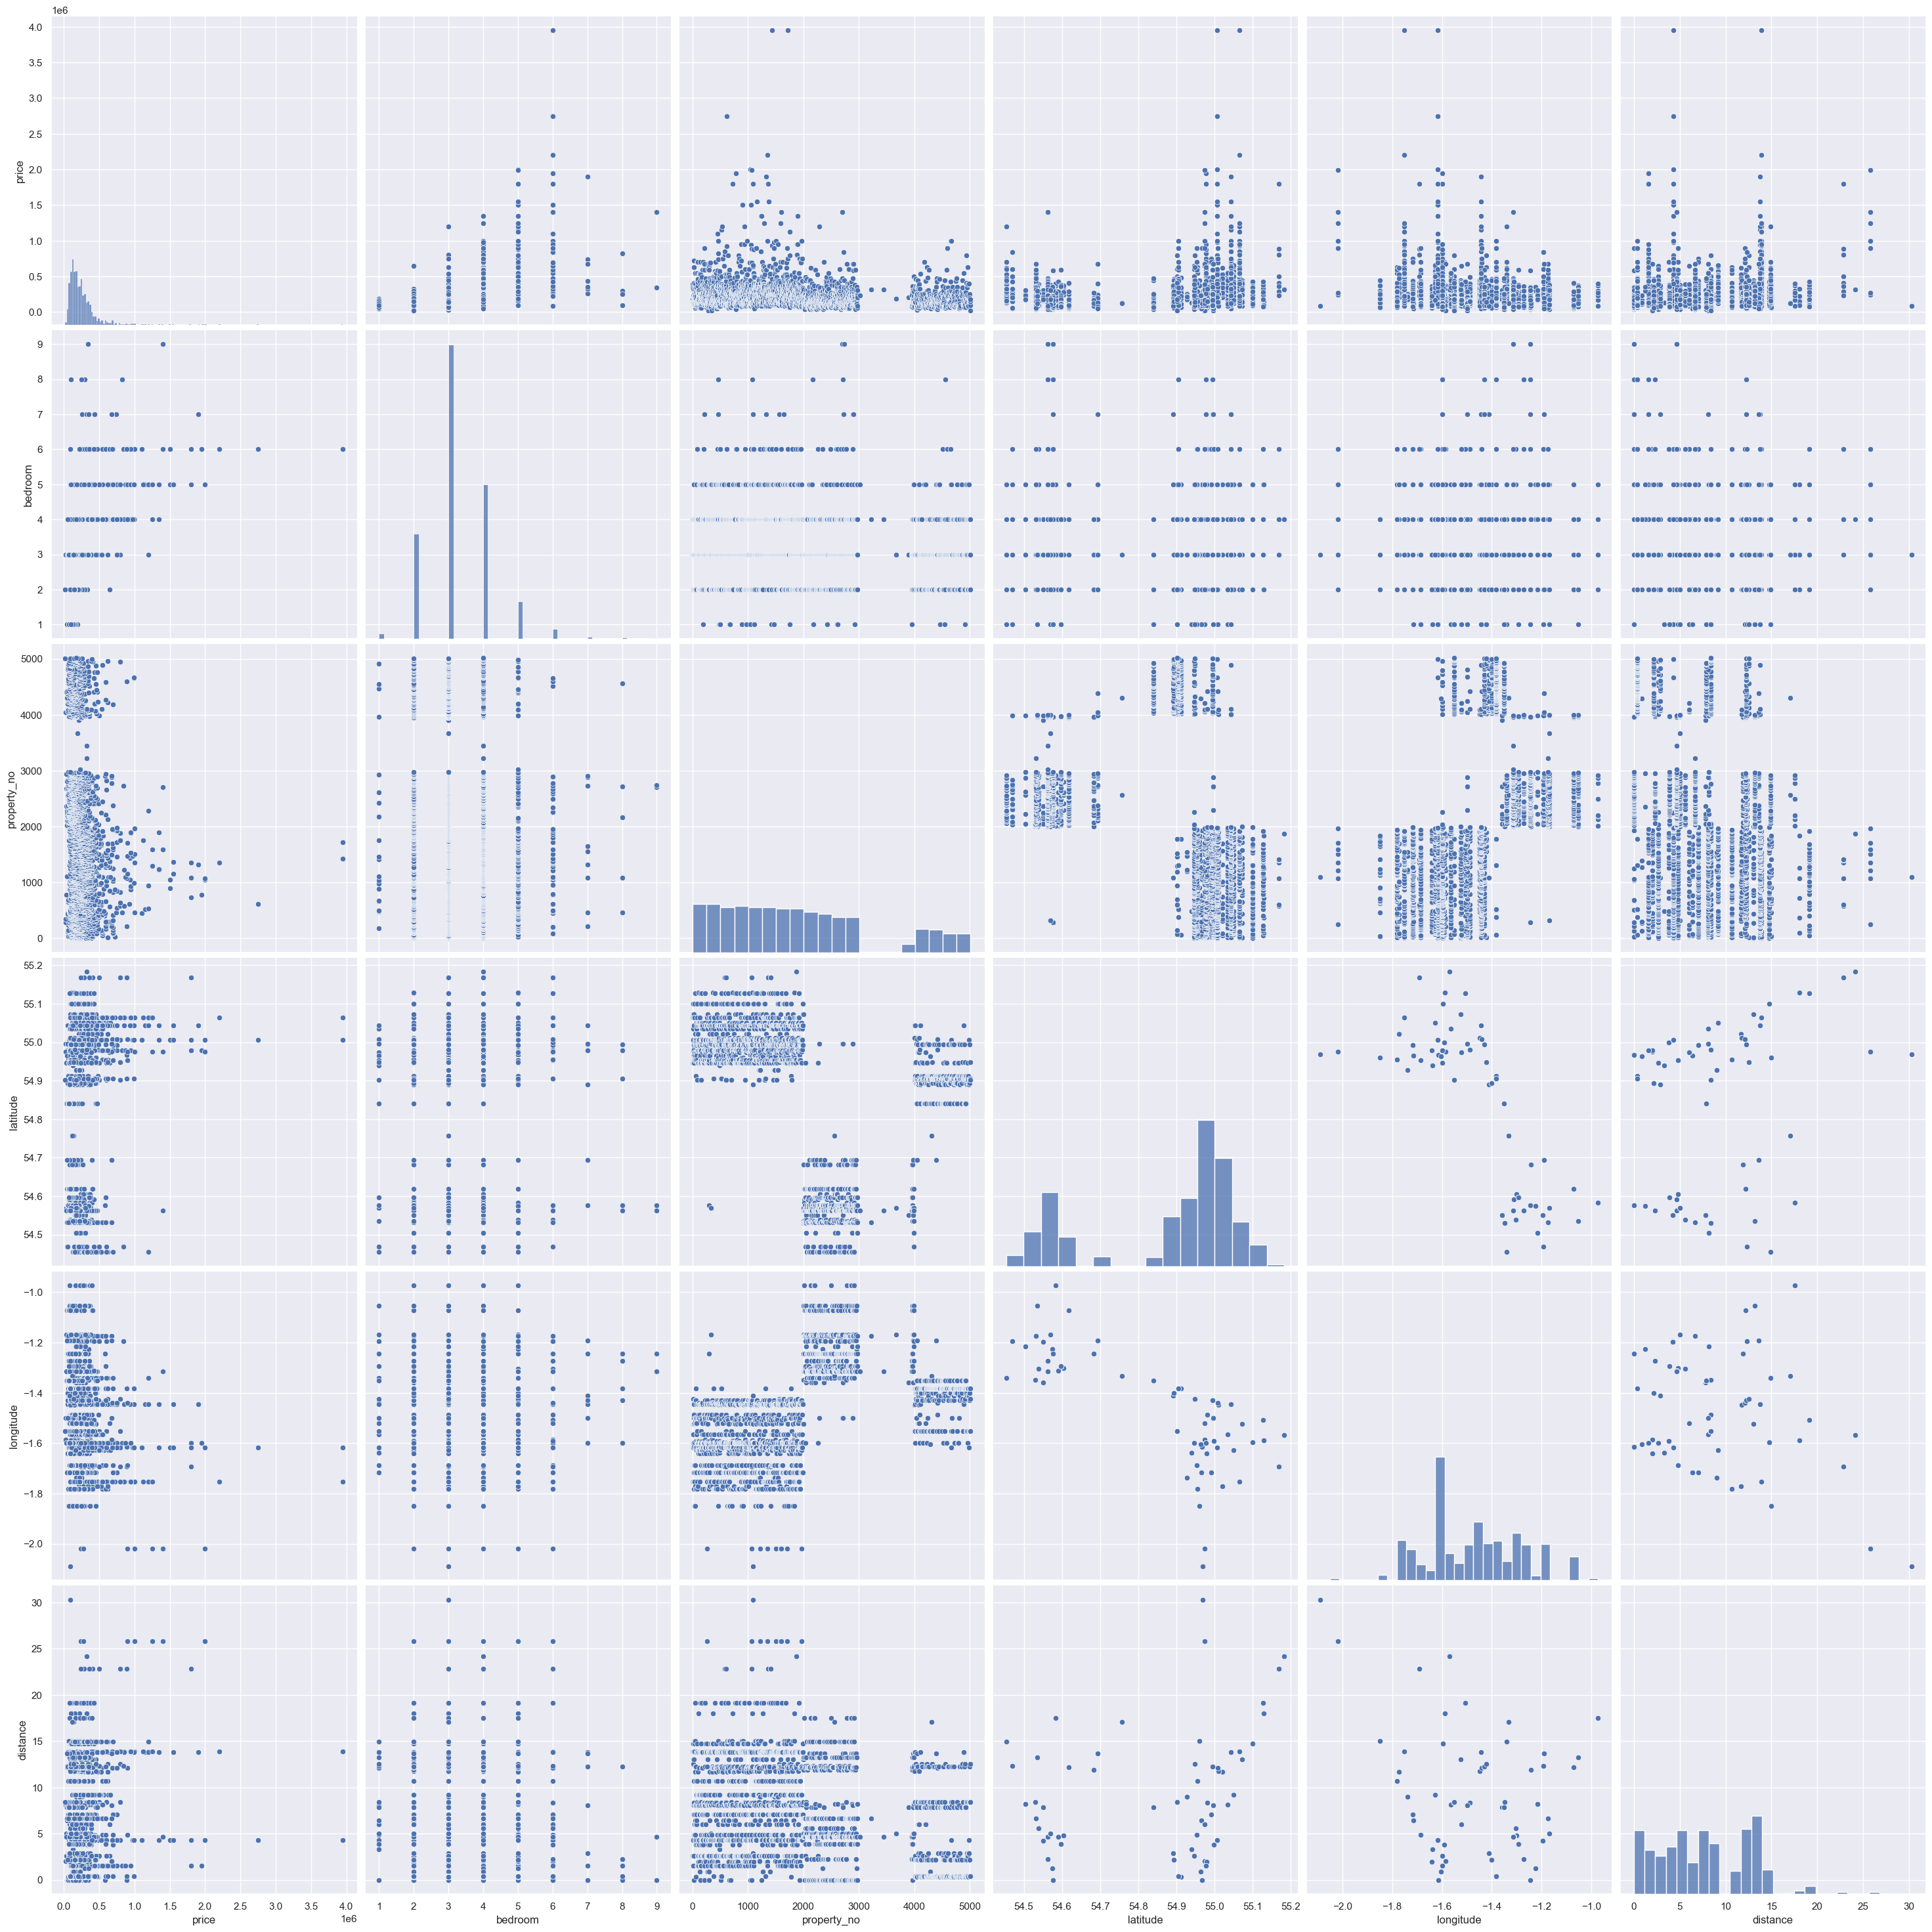

In [41]:
sns.set(font_scale=1)
sns.pairplot(df,
             height = 5)
plt.show()

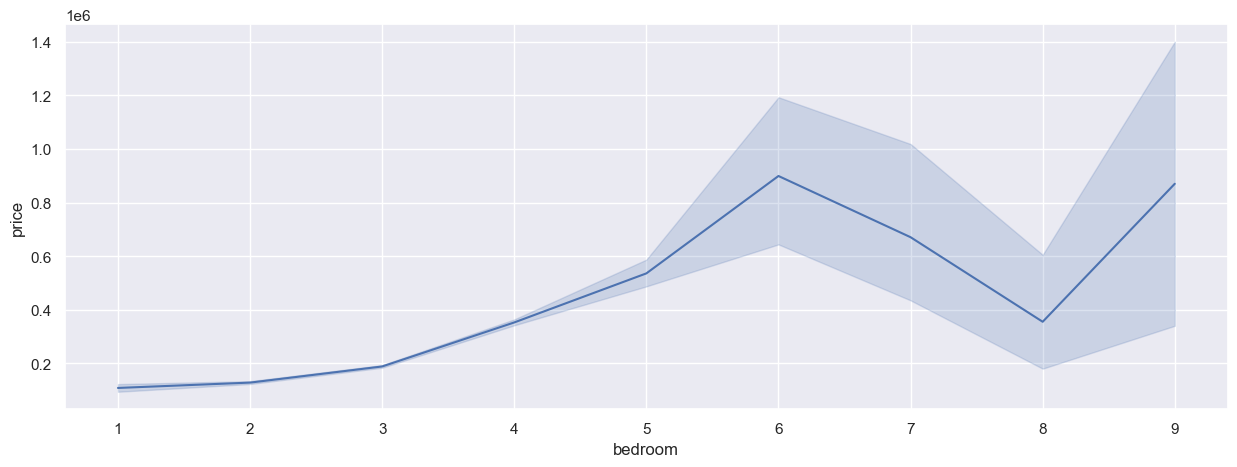

In [42]:
### price vs bedrooms relationship (clearly shows a relationship from 1-6, parabolic?)
plt.figure(figsize=[15,5])
sns.lineplot(data=df[['bedroom', 'price']], x='bedroom',y='price')
plt.show()

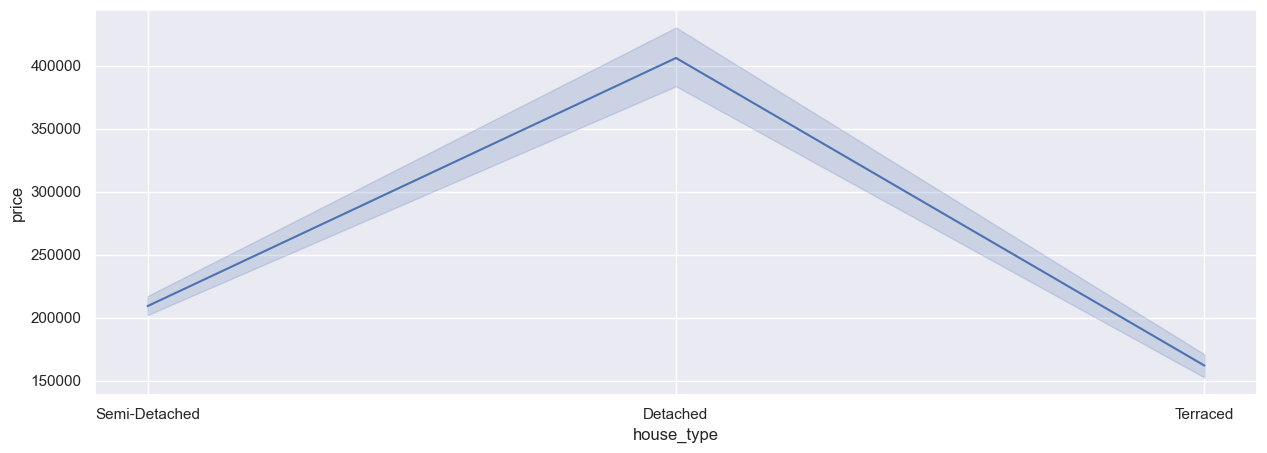

In [43]:
# If there is 'Semi-detached share' here, the code hasn't run properly from the 'cleaning data' notebook
### price vs house_type relationship (clearly shows a linear relationship. Detached, semi-detached, terraced)
plt.figure(figsize=[15,5])
sns.lineplot(data=df[['house_type', 'price']], x='house_type',y='price')
plt.show()

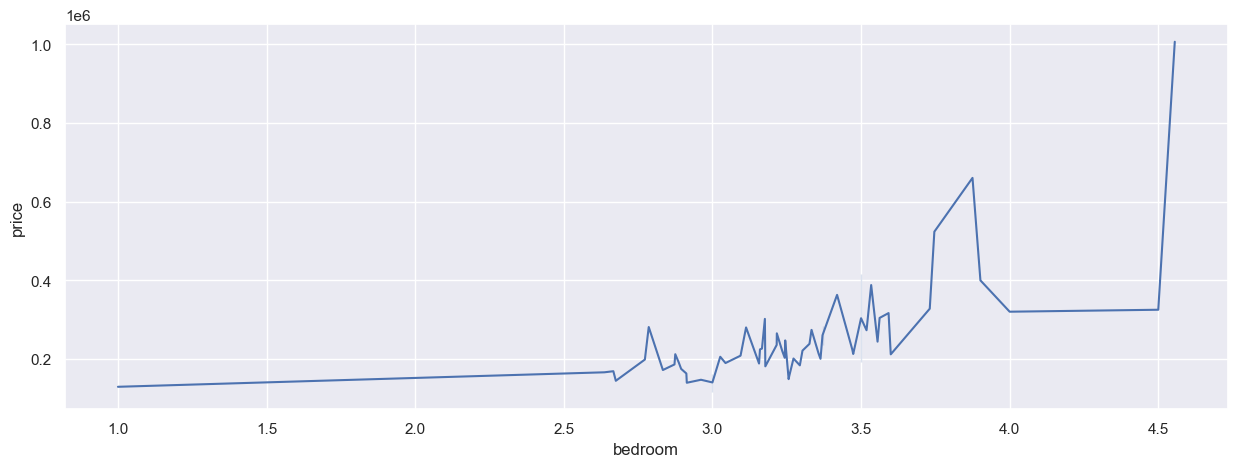

In [44]:
### Price vs bedrooms based on postcode
df_post = df.groupby('postcode')[['bedroom', 'price']].mean().sort_values(by='price', ascending=True)

plt.figure(figsize=[15,5])
sns.lineplot(data=df_post[['bedroom', 'price']], x='bedroom',y='price')
plt.show()

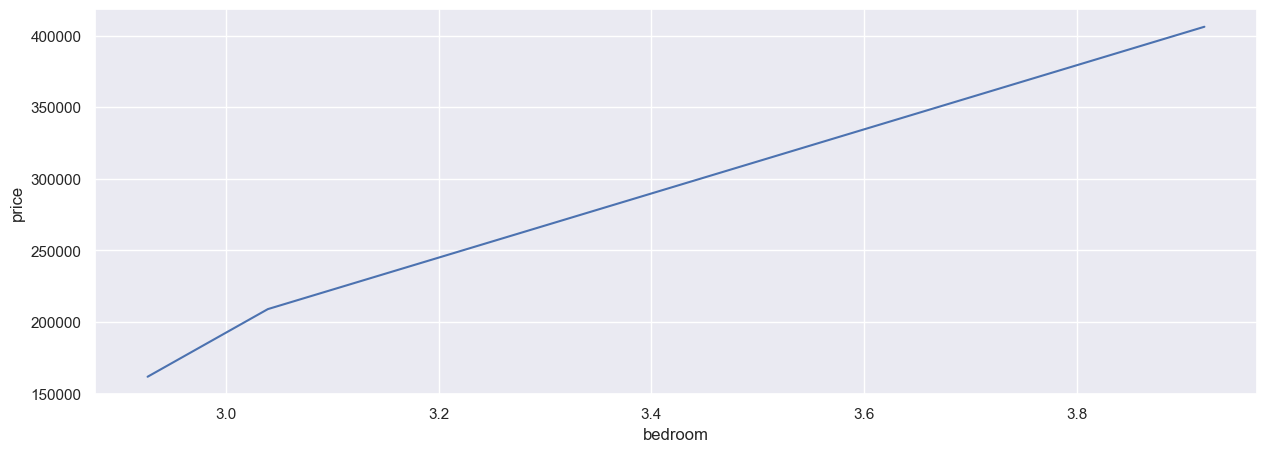

In [45]:
### Price vs bedrooms based on house_type
df_htype = df.groupby('house_type')[['bedroom', 'price']].mean().sort_values(by='price', ascending=True)

plt.figure(figsize=[15,5])
sns.lineplot(data=df_htype[['bedroom', 'price']], x='bedroom',y='price')
plt.show()

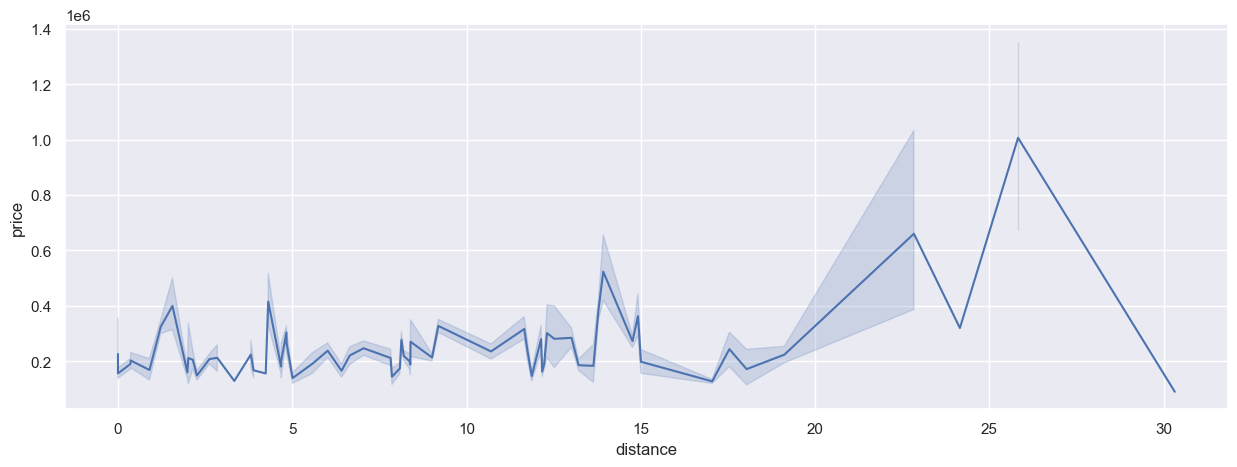

In [46]:
### Price vs distance
plt.figure(figsize=[15,5])
sns.lineplot(data=df[['distance', 'price']], x='distance',y='price')
plt.show()

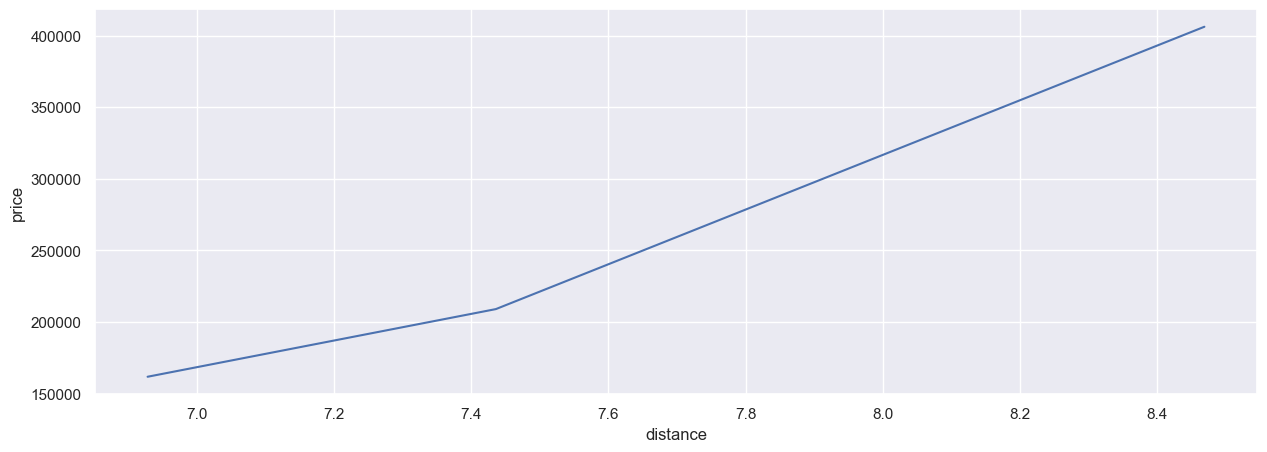

In [47]:
### Price vs distance based on house_type
df_htype = df.groupby('house_type')[['distance', 'price']].mean().sort_values(by='price', ascending=True)

plt.figure(figsize=[15,5])
sns.lineplot(data=df_htype[['distance', 'price']], x='distance',y='price')
plt.show()

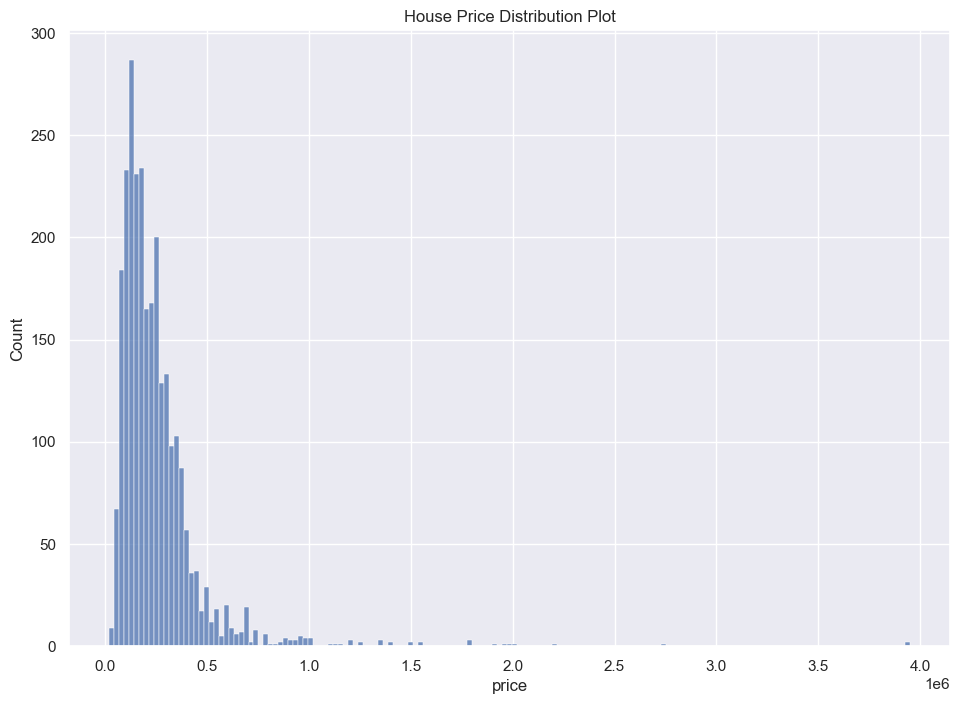

In [48]:
### House price distribution plot
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price)

plt.show()

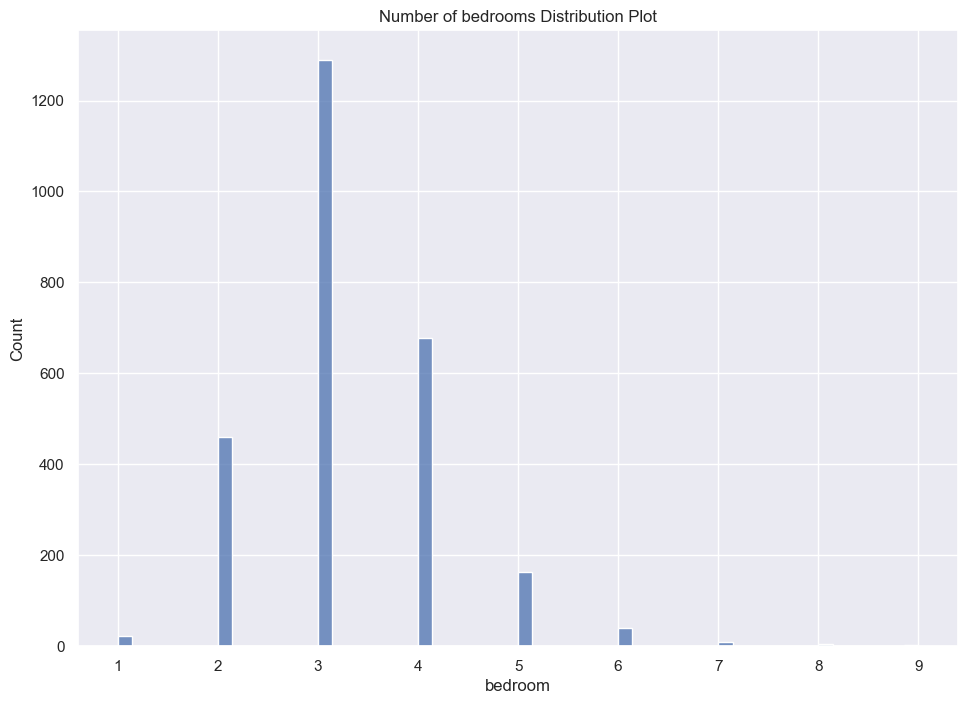

In [49]:
### bedrooms distribution plot
plt.show()
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
plt.title('Number of bedrooms Distribution Plot')
sns.histplot(df.bedroom)

plt.show()

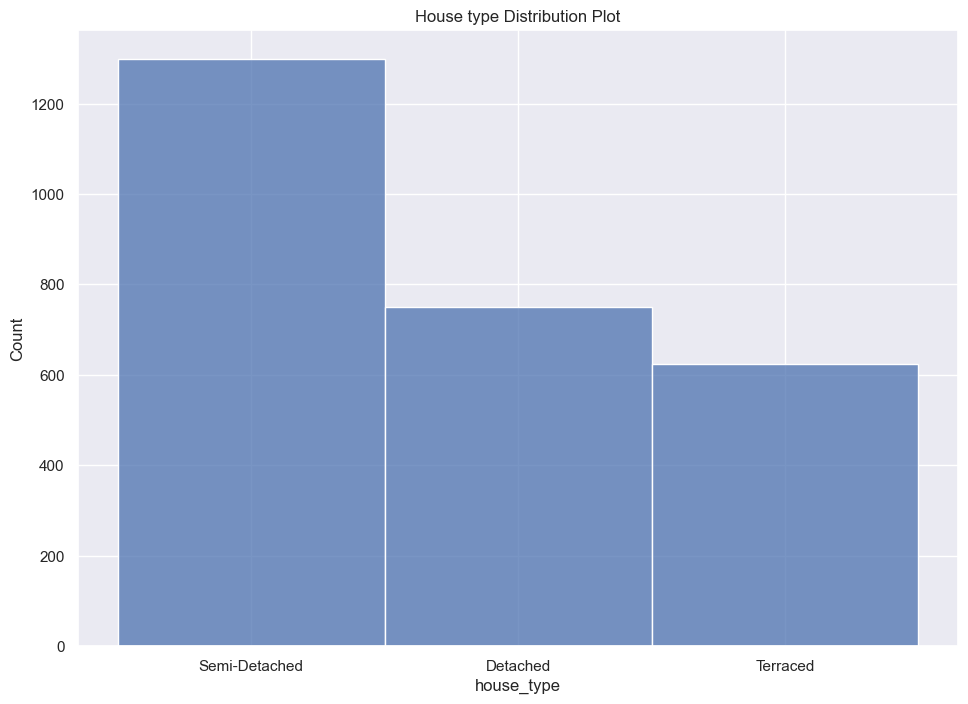

In [50]:
### House type distribution plot
plt.show()
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
plt.title('House type Distribution Plot')
sns.histplot(df.house_type)

plt.show()

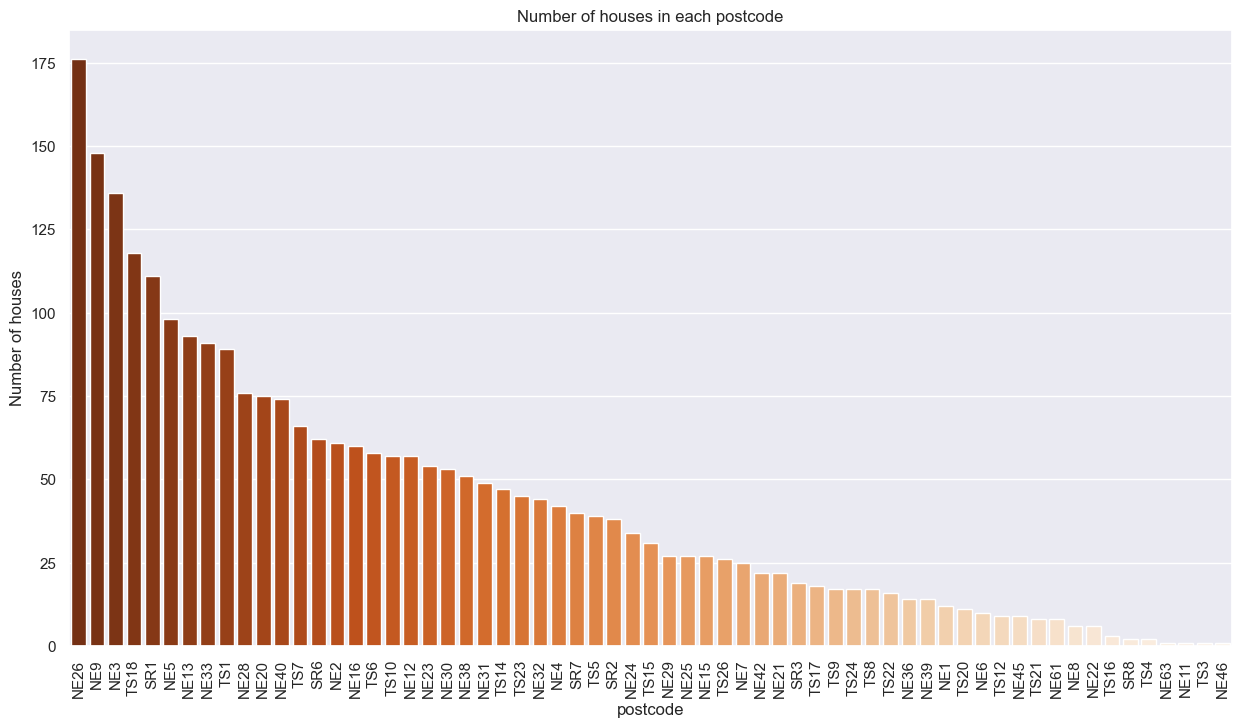

In [52]:
### Number of houses in each postcode

post_count_df = df.groupby('postcode')['property_no'].count().sort_values(ascending=False)
new_df = pd.DataFrame(post_count_df.reset_index())

plt.figure(figsize=(15, 8))
plt.title('Number of houses in each postcode')
sns.barplot(data = new_df, x ='postcode', y = 'property_no', palette = 'Oranges_r' )
plt.xticks(rotation =90)
plt.ylabel('Number of houses')
plt.show()

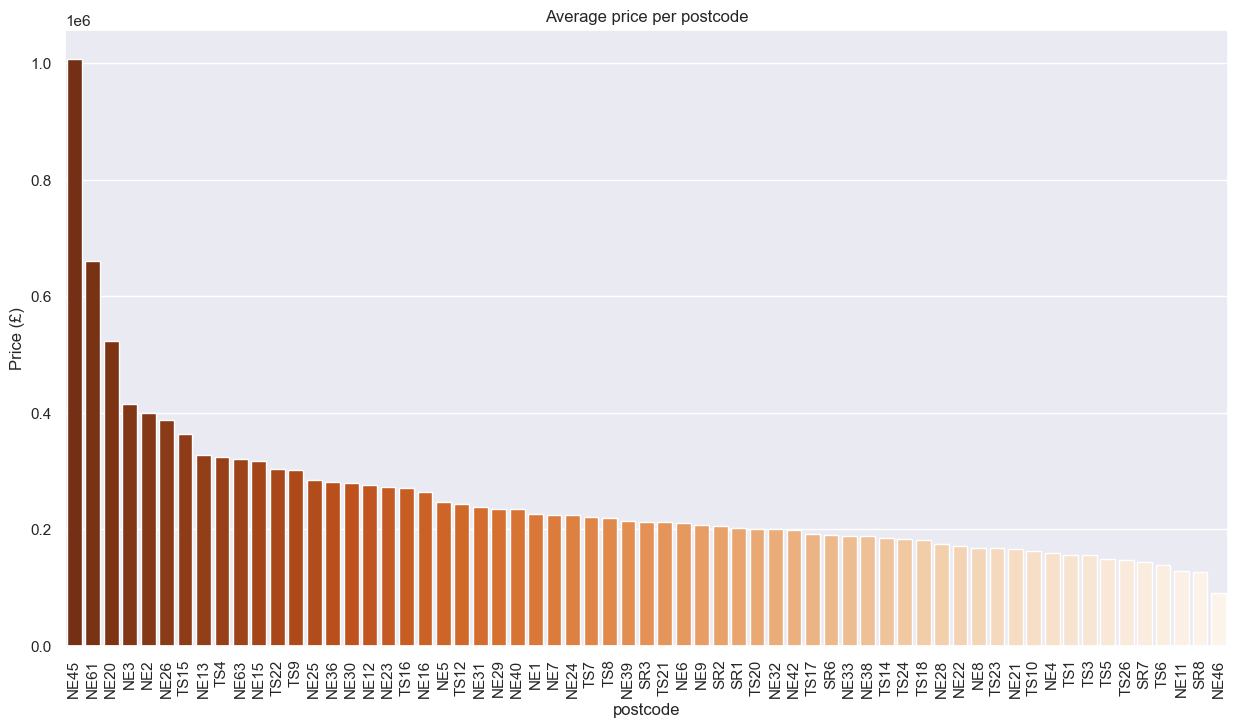

In [53]:
### Average price per house in each postcode

post_count_df = df.groupby('postcode')['price'].mean().sort_values(ascending=False)
new_df = pd.DataFrame(post_count_df.reset_index())

plt.figure(figsize=(15, 8))
plt.title('Average price per postcode')
sns.barplot(data = new_df, x ='postcode', y = 'price', palette = 'Oranges_r' )
plt.xticks(rotation =90)
plt.ylabel('Price (£)')
plt.show()

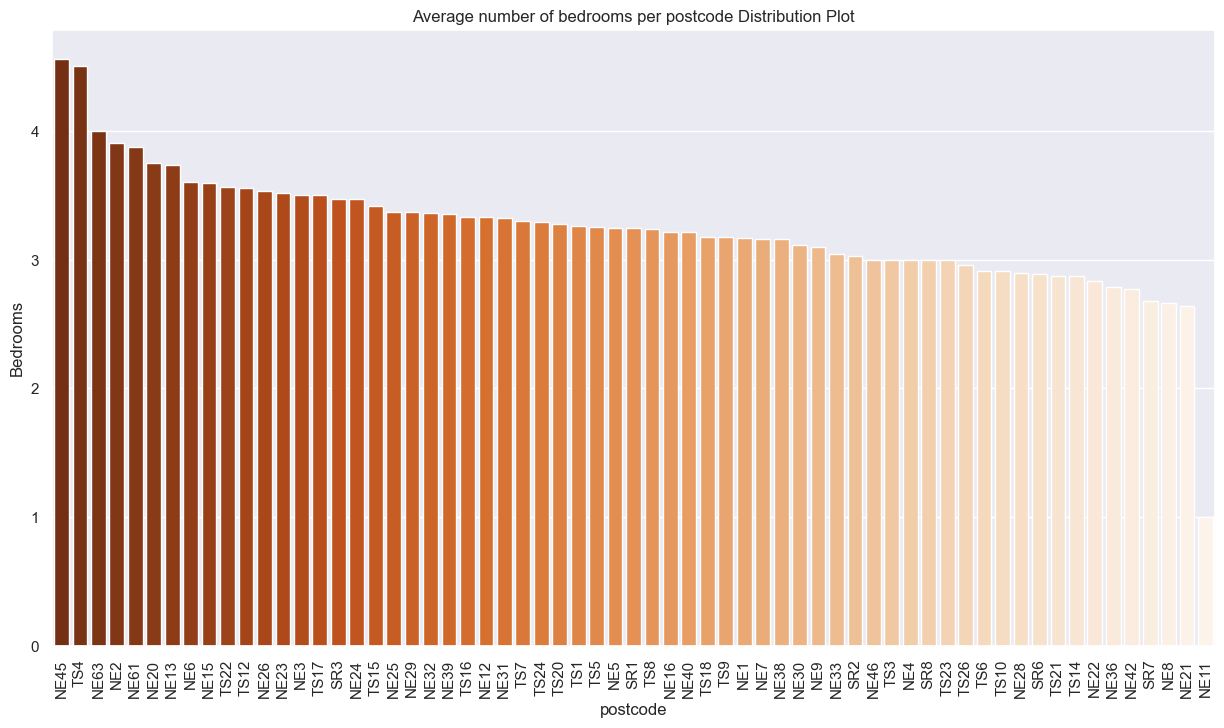

In [54]:
### Average number of bedrooms in each postcode Distribution Plot

post_count_df = df.groupby('postcode')['bedroom'].mean().sort_values(ascending=False)
new_df = pd.DataFrame(post_count_df.reset_index())

plt.figure(figsize=(15, 8))
plt.title('Average number of bedrooms per postcode Distribution Plot')
sns.barplot(data = new_df, x ='postcode', y = 'bedroom', palette = 'Oranges_r' )
plt.xticks(rotation =90)
plt.ylabel('Bedrooms')
plt.show()

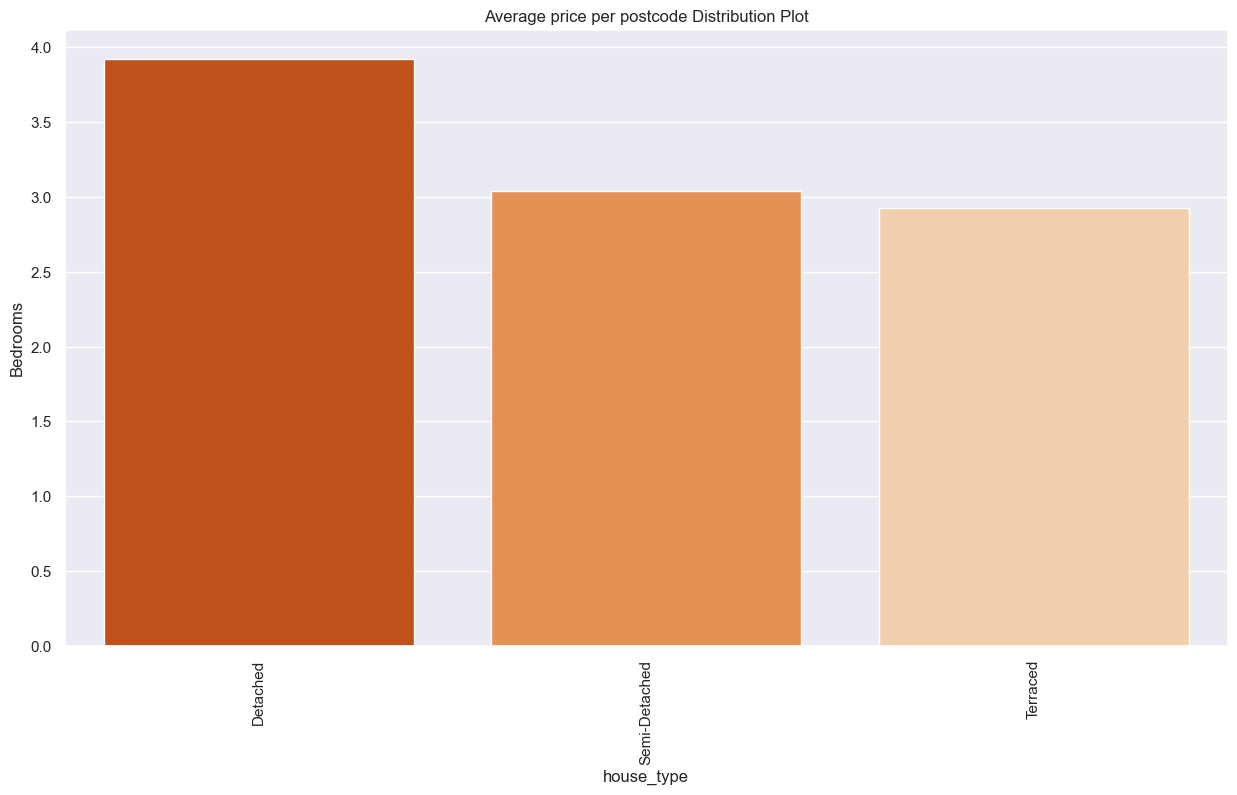

In [55]:
### Average number of bedrooms for each house type

post_count_df = df.groupby('house_type')['bedroom'].mean().sort_values(ascending=False)
new_df = pd.DataFrame(post_count_df.reset_index())

plt.figure(figsize=(15, 8))
plt.title('Average price per postcode Distribution Plot')
sns.barplot(data = new_df, x ='house_type', y = 'bedroom', palette = 'Oranges_r' )
plt.xticks(rotation =90)
plt.ylabel('Bedrooms')
plt.show()

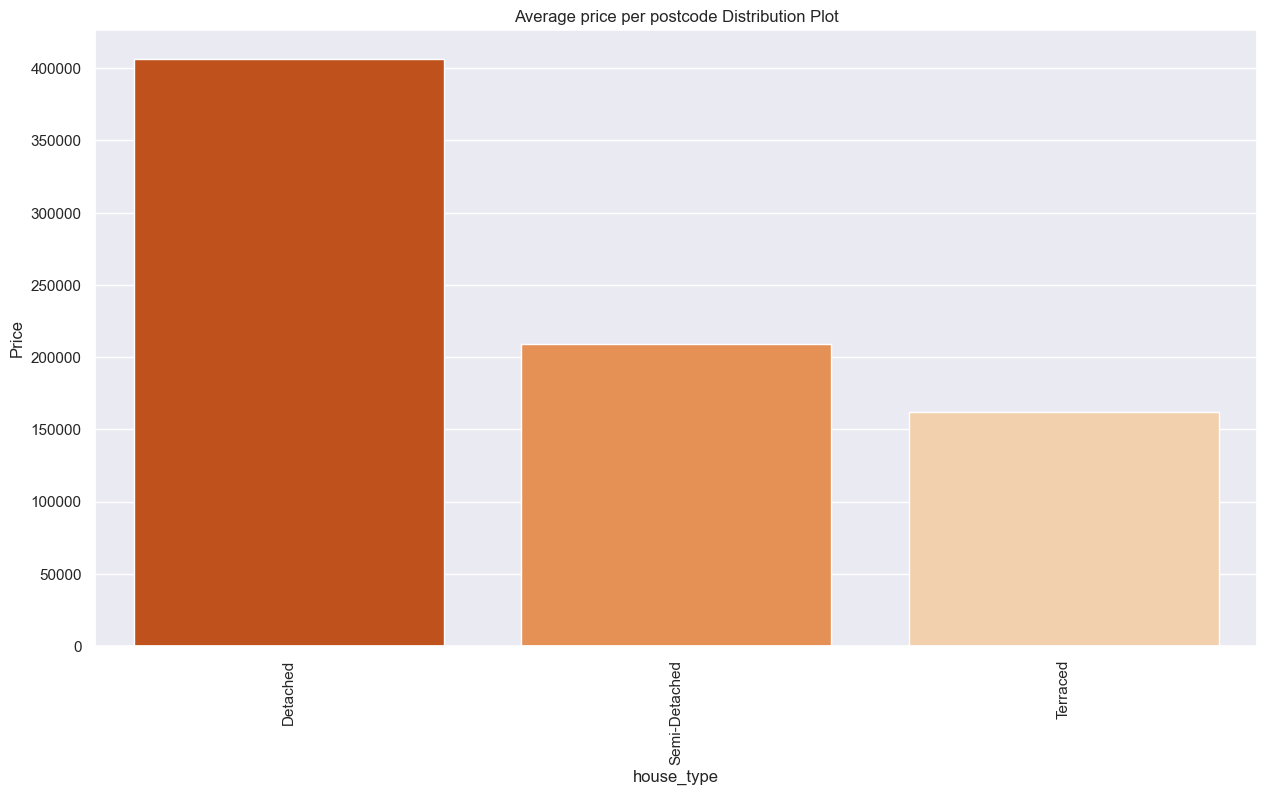

In [59]:
### Average price for each house type

post_count_df = df.groupby('house_type')['price'].mean().sort_values(ascending=False)
new_df = pd.DataFrame(post_count_df.reset_index())

plt.figure(figsize=(15, 8))
plt.title('Average price per postcode Distribution Plot')
sns.barplot(data = new_df, x ='house_type', y = 'price', palette = 'Oranges_r' )
plt.xticks(rotation =90)
plt.ylabel('Price')
plt.show()

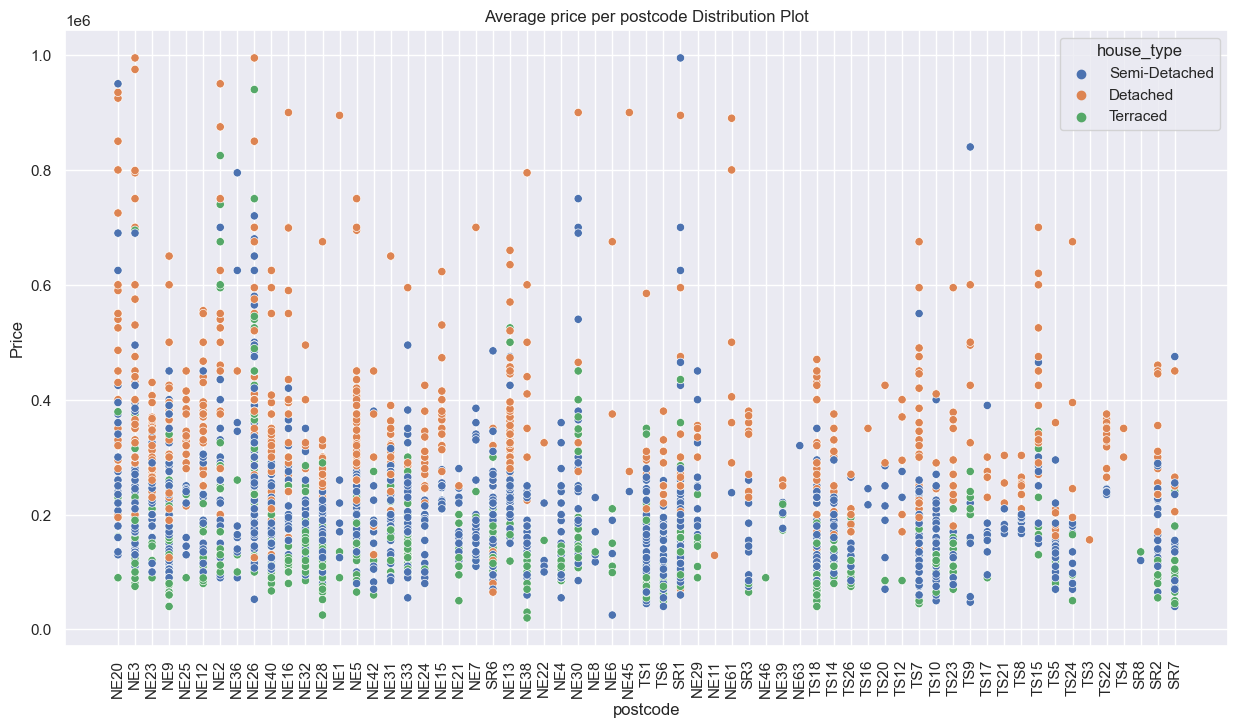

In [57]:
## How the house type affects price in different postcodes

df_lessthanone = df[df['price'] < 1000000]

plt.figure(figsize=(15, 8))
plt.title('Average price per postcode Distribution Plot')
sns.scatterplot(data = df_lessthanone, x ='postcode', y = 'price', hue = 'house_type')
plt.xticks(rotation =90)
plt.ylabel('Price')
plt.show()

<font size="6"><font color='orange'>Save the cleaned EDA data</font>

In [58]:
df.to_csv('eda_cleaned_data.csv')